In [12]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from xgboost import XGBClassifier

from xgboost import plot_importance

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,classification_report

In [13]:
# Generate synthetic data

X,y = make_classification(
    n_samples=500, 
    n_features=10,
    n_informative=2,
    n_redundant=2,
    random_state=42
    )

In [14]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [15]:
# Train model

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=3, 
    learning_rate=0.1
    )

In [16]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

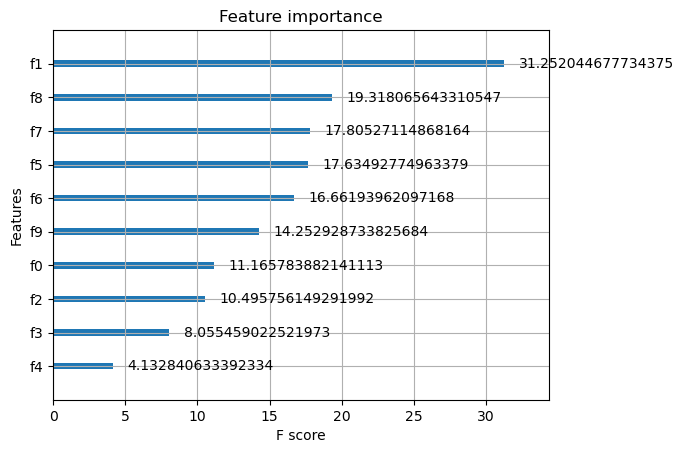

In [17]:
# Plot feature importance

plot_importance(xgb, importance_type='cover') # Options: 'weight', 'gain', 'cover'

plt.show()

Removing Low Important Features

In [18]:
# Get feature importance scores

feature_importances = xgb.feature_importances_

In [19]:
# Select features with importance > threshold

threshold = 0.01  # Adjust as needed



selected_features = X_train.columns[feature_importances > threshold]

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
# Train model with selected features

X_train_selected = X_train[selected_features]

X_test_selected = X_test[selected_features]

In [ ]:
xgb.fit(X_train_selected, y_train)

accuracy = accuracy_score(X_test_selected,y_test)

print(f"Accuracy after Feature Selection : {accuracy}")